df.count() returns number of non null entries 

In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets


iris = datasets.load_iris()
X = iris.data
y = iris.target

df = pd.DataFrame(data = np.c_[iris.data, iris.target], columns = iris['feature_names'] + ['target'])
df.head()
df.columns


#from sklearn.datasets import load_iris
#import pandas as pd

#data = load_iris()
#df = pd.DataFrame(data.data, columns=data.feature_names)
#df.head()
#df.describe() # summary statistics
df.count() # non null entries
df.mean()
df.quantile()
df.plot(kind= 'box')

0    3.5
Name: 0.5, dtype: float64

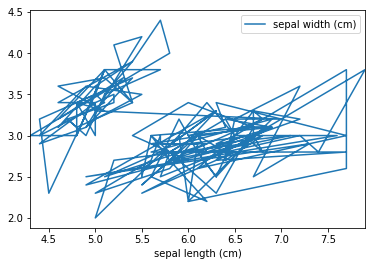

In [21]:
df.plot(x = 'sepal length (cm)', y = 'sepal width (cm)')
plt.show()

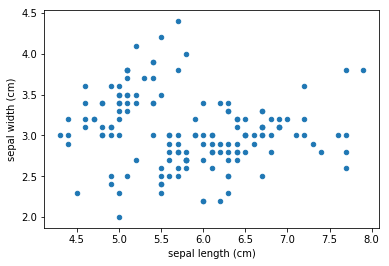

In [24]:
df.plot(x = 'sepal length (cm)', y = 'sepal width (cm)', kind = 'scatter')
plt.ylabel('sepal width (cm)')
plt.xlabel('sepal length (cm)')
plt.show()

Text(0, 0.5, 'sepal width (cm) ')

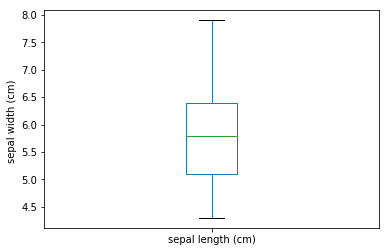

In [26]:
df.plot(y ='sepal length (cm)' , kind = 'box')
plt.ylabel('sepal width (cm) ')

Text(0, 0.5, 'frequency')

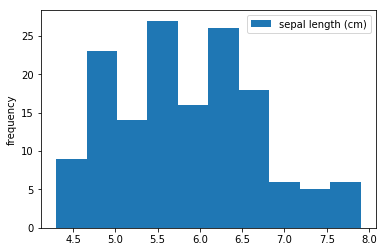

In [29]:
df.plot(y = 'sepal length (cm)', kind = 'hist') # pdf
plt.ylabel('frequency')

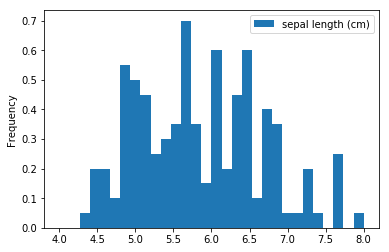

In [31]:
df.plot(y = 'sepal length (cm)', kind = 'hist', bins = 30, range = (4,8) , density = True)

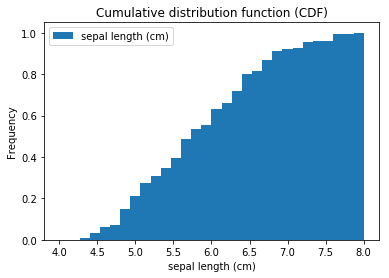

In [33]:
# CDF compute the probability in a given range
df.plot(y = 'sepal length (cm)', kind = 'hist', bins = 30, range = (4,8) , density = True, cumulative = True)
plt.xlabel('sepal length (cm)')
plt.title('Cumulative distribution function (CDF)')
plt.show()

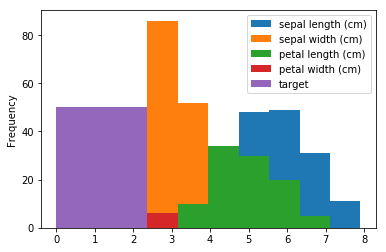

In [36]:
df.plot(kind = 'hist')

#Syntax \ results differ !

In [37]:
df.plt.hist()


AttributeError: 'DataFrame' object has no attribute 'plt'

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001BF47246EF0>,
      dtype=object)

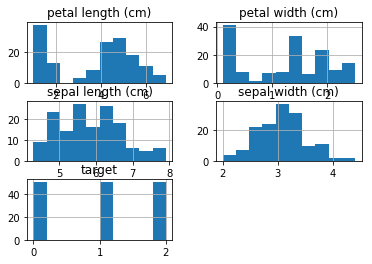

In [38]:
df.hist()

In [ ]:
# Create a list of y-axis column names: y_columns
y_columns =['AAPL','IBM']

# Generate a line plot
df.plot(x= 'Month', y = y_columns)

# Add the title
plt.title('Monthly stock prices')

# Add the y-axis label
plt.ylabel('Price ($US)')

# Display the plot
plt.show()

In [83]:
col_names = ['mpg', 'cyl', 'displ', 'hp', 'weight', 'accel', 'yr', 'origin', 'name']
df  = pd.read_csv('data/auto_mpg.data',header = None,names = col_names, delim_whitespace=True,na_values = '?')



In [84]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 9 columns):
mpg       398 non-null float64
cyl       398 non-null int64
displ     398 non-null float64
hp        392 non-null float64
weight    398 non-null float64
accel     398 non-null float64
yr        398 non-null int64
origin    398 non-null int64
name      398 non-null object
dtypes: float64(5), int64(3), object(1)
memory usage: 28.1+ KB


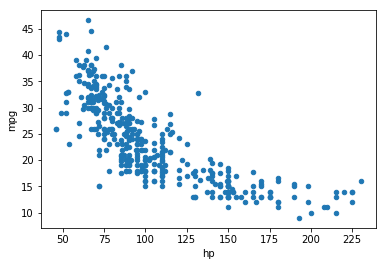

In [85]:
df.plot(x = 'hp',y='mpg', kind = 'scatter')
# Automobiles with higher horsepower are less fuel efficients

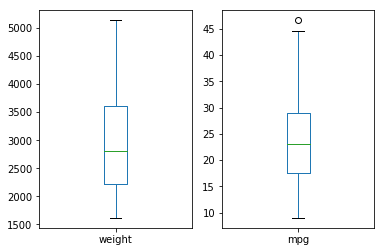

In [86]:
# Make a list of the column names to be plotted: cols
cols = ['weight','mpg']

# Generate the box plots
df[cols].plot(subplots = True, kind = 'box')

# Display the plot
plt.show()

pandas hist, pdf and cdf
Pandas relies on the .hist() method to not only generate histograms, but also plots of probability density functions (PDFs) and cumulative density functions (CDFs).

In this exercise, you will work with a dataset consisting of restaurant bills that includes the amount customers tipped.

The original dataset is provided by the Seaborn package.

Your job is to plot a PDF and CDF for the fraction column of the tips dataset. This column contains information about what fraction of the total bill is comprised of the tip.

Remember, when plotting the PDF, you need to specify normed=True in your call to .hist(), and when plotting the CDF, you need to specify cumulative=True in addition to normed=True.

All necessary modules have been imported and the tips dataset is available in the workspace as df. Also, some formatting code has been written so that the plots you generate will appear on separate rows.


In [89]:
df = pd.read_csv('data/tips.csv')
df['fraction'] = df['tip'].values/df['total_bill'].values
df.head()

,total_bill,tip,sex,smoker,day,time,size,fraction
0,16.99,1.01,Female,No,Sun,Dinner,2,0.059447
1,10.34,1.66,Male,No,Sun,Dinner,3,0.160542
2,21.01,3.50,Male,No,Sun,Dinner,3,0.166587
3,23.68,3.31,Male,No,Sun,Dinner,2,0.139780
4,24.59,3.61,Female,No,Sun,Dinner,4,0.146808


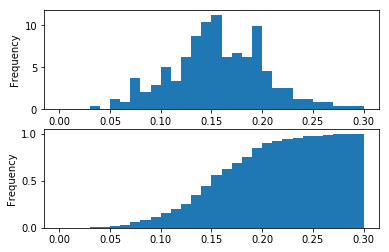

In [93]:
# This formats the plots such that they appear on separate rows
fig, axes = plt.subplots(nrows=2, ncols=1)


# Plot the PDF
df.fraction.plot(ax=axes[0], kind = 'hist', normed = True, bins= 30, range=(0,.3))

# Plot the CDF
df.fraction.plot(ax=axes[1], kind = 'hist', normed = True , bins =30 , cumulative = True, range=(0,.3))
plt.show()

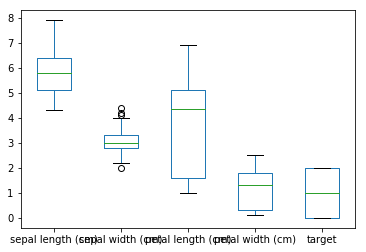

Quantiles
In this exercise, you'll investigate the probabilities of life expectancy in countries around the world. This dataset contains life expectancy for persons born each year from 1800 to 2015. Since country names change or results are not reported, not every country has values. This dataset was obtained from Gapminder.

First, you will determine the number of countries reported in 2015. There are a total of 260 unique countries in the entire dataset. Then, you will compute the 5th and 95th percentiles of life expectancy over the entire dataset. Finally, you will make a box plot of life expectancy every 50 years from 1800 to 2000. Notice the large change in the distributions over this period.

The dataset has been pre-loaded into a DataFrame called df.

In [ ]:
# Print the number of countries reported in 2015
print(df['2015'].count)

# Print the 5th and 95th percentiles
print(df.quantile([0.05, 0.95]))

# Generate a box plot
years = ['1800','1850','1900','1950','2000']
df[years].plot(kind='box')
plt.show()